## Task-1 : Stock Prediction

In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas
from pandas_datareader import data as pdr
key=""

In [3]:
import yfinance as yfin

In [4]:
yfin.pdr_override()

In [5]:
df = pdr.get_data_yahoo('AAPL', start='2016-01-01', end='2021-08-01') 

[*********************100%%**********************]  1 of 1 completed


In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('AAPL.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.009068,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.407410,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,22.949337,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,21.980770,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.096998,283192000


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1399,2021-07-26,148.270004,149.830002,147.699997,148.990005,147.065704,72434100
1400,2021-07-27,149.119995,149.210007,145.550003,146.770004,144.874359,104818600
1401,2021-07-28,144.809998,146.970001,142.539993,144.979996,143.107483,118931200
1402,2021-07-29,144.690002,146.550003,144.580002,145.639999,143.758957,56699500
1403,2021-07-30,144.380005,146.330002,144.110001,145.860001,143.976105,70440600


In [11]:
df1=df.reset_index()['Close']

In [12]:
df1

0        26.337500
1        25.677500
2        25.174999
3        24.112499
4        24.240000
           ...    
1399    148.990005
1400    146.770004
1401    144.979996
1402    145.639999
1403    145.860001
Name: Close, Length: 1404, dtype: float64

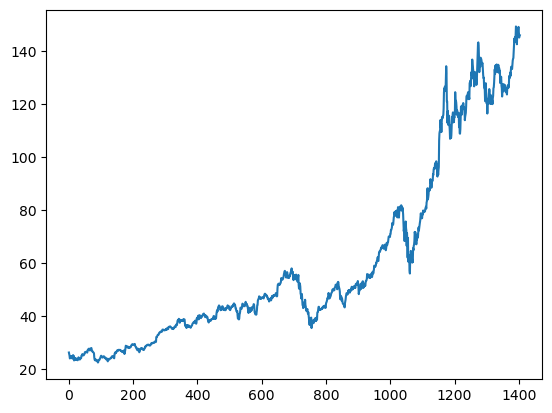

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
import numpy as np

In [16]:
df1

0        26.337500
1        25.677500
2        25.174999
3        24.112499
4        24.240000
           ...    
1399    148.990005
1400    146.770004
1401    144.979996
1402    145.639999
1403    145.860001
Name: Close, Length: 1404, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.0296488 ]
 [0.02443409]
 [0.0204638 ]
 ...
 [0.96705252]
 [0.97226726]
 [0.9740055 ]]


In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(912, 492)

In [21]:
train_data

array([[0.0296488 ],
       [0.02443409],
       [0.0204638 ],
       [0.0120689 ],
       [0.01307629],
       [0.01617746],
       [0.0190021 ],
       [0.01392566],
       [0.01813298],
       [0.01341208],
       [0.01248372],
       [0.0127405 ],
       [0.01177262],
       [0.02188599],
       [0.01797497],
       [0.01906136],
       [0.00608383],
       [0.00740726],
       [0.01382689],
       [0.0120294 ],
       [0.00817763],
       [0.01187138],
       [0.01236519],
       [0.00726899],
       [0.00922452],
       [0.00918501],
       [0.00776281],
       [0.00663691],
       [0.00720974],
       [0.01244421],
       [0.01536761],
       [0.01169361],
       [0.01125905],
       [0.01291827],
       [0.00859244],
       [0.01137756],
       [0.01268124],
       [0.01297754],
       [0.01254297],
       [0.020128  ],
       [0.02056256],
       [0.02204402],
       [0.02502668],
       [0.02277487],
       [0.02111564],
       [0.02129342],
       [0.02139217],
       [0.023

In [ ]:
# convert an array of values into a dataset matrix

In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(811, 100)
(811,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(391, 100)
(391,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 9s 316ms/step - loss: 0.0052 - val_loss: 0.1383
Epoch 2/100
13/13 [==============================] - 3s 262ms/step - loss: 0.0013 - val_loss: 0.0384
Epoch 3/100
13/13 [==============================] - 3s 255ms/step - loss: 4.5595e-04 - val_loss: 0.0040
Epoch 4/100
13/13 [==============================] - 3s 233ms/step - loss: 3.1595e-04 - val_loss: 0.0047
Epoch 5/100
13/13 [==============================] - 3s 264ms/step - loss: 2.5447e-04 - val_loss: 0.0099
Epoch 6/100
13/13 [==============================] - 3s 262ms/step - loss: 2.4799e-04 - val_loss: 0.0070
Epoch 7/100
13/13 [==============================] - 3s 244ms/step - loss: 2.3466e-04 - val_loss: 0.0052
Epoch 8/100
13/13 [==============================] - 3s 248ms/step - loss: 2.1821e-04 - val_loss: 0.0075
Epoch 9/100
13/13 [==============================] - 3s 243ms/step - loss: 2.1631e-04 - val_loss: 0.0075
Epoch 10/100
13/13 [==============================] - 3s 241ms/

13/13 [==============================] - 3s 250ms/step - loss: 7.5575e-05 - val_loss: 0.0047
Epoch 79/100
13/13 [==============================] - 3s 254ms/step - loss: 7.3644e-05 - val_loss: 0.0037
Epoch 80/100
13/13 [==============================] - 3s 256ms/step - loss: 7.5693e-05 - val_loss: 0.0055
Epoch 81/100
13/13 [==============================] - 3s 225ms/step - loss: 7.2816e-05 - val_loss: 0.0025
Epoch 82/100
13/13 [==============================] - 3s 260ms/step - loss: 7.3470e-05 - val_loss: 0.0024
Epoch 83/100
13/13 [==============================] - 4s 287ms/step - loss: 7.3133e-05 - val_loss: 0.0036
Epoch 84/100
13/13 [==============================] - 4s 286ms/step - loss: 7.2325e-05 - val_loss: 0.0034
Epoch 85/100
13/13 [==============================] - 4s 288ms/step - loss: 7.7327e-05 - val_loss: 0.0034
Epoch 86/100
13/13 [==============================] - 4s 293ms/step - loss: 8.7383e-05 - val_loss: 0.0016
Epoch 87/100
13/13 [==============================] - 4s 28

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.13.0'

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 [==============================] - 1s 53ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

41.19936426669494

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

107.55302296688987

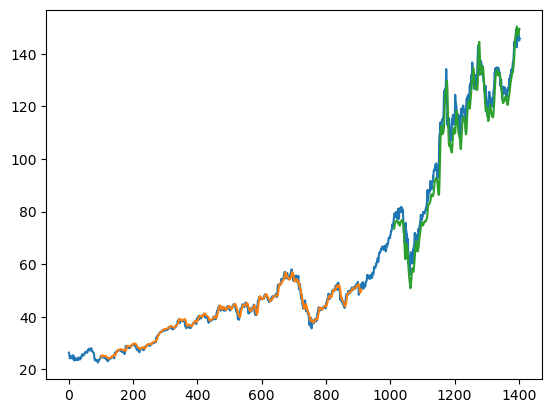

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

492

In [40]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 151)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.8562794775156041,
 0.8642595237229783,
 0.9015526254033742,
 0.8871726040797686,
 0.8780864116598782,
 0.8699483101190316,
 0.8440327812307423,
 0.8566744350079424,
 0.8218307087527873,
 0.8559633668486594,
 0.8648916244959727,
 0.84063525464601,
 0.8392131183274442,
 0.8557263441288984,
 0.8400822418201995,
 0.8260972985498273,
 0.8315490622261196,
 0.8647335691625003,
 0.90297476172194,
 0.9203572315770444,
 0.9507763127016872,
 0.9526726150206698,
 0.9439813800931177,
 0.9047130087074503,
 0.8641805563366897,
 0.8814048502974267,
 0.8881208155197077,
 0.8798246586453887,
 0.9070833564659552,
 0.9021056382291847,
 0.9032908723888847,
 0.8961798291133706,
 0.8912811988237838,
 0.8892269617322238,
 0.8911231434903114,
 0.8738988495295744,
 0.8553312660756652,
 0.846403128989247,
 0.8476672099743404,
 0.8170900735162254,
 0.8159839273037093,
 0.8119543602264303,
 0.7775056517440609,
 0.7796389767828049,
 0.8312330118396224,
 0.8101371458546313,
 0.7859598036714049,
 0.770710719135491

In [43]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.86425952 0.90155263 0.8871726  0.87808641 0.86994831 0.84403278
 0.85667444 0.82183071 0.85596337 0.86489162 0.84063525 0.83921312
 0.85572634 0.84008224 0.8260973  0.83154906 0.86473357 0.90297476
 0.92035723 0.95077631 0.95267262 0.94398138 0.90471301 0.86418056
 0.88140485 0.88812082 0.87982466 0.90708336 0.90210564 0.90329087
 0.89617983 0.8912812  0.88922696 0.89112314 0.87389885 0.85533127
 0.84640313 0.84766721 0.81709007 0.81598393 0.81195436 0.77750565
 0.77963898 0.83123301 0.81013715 0.7859598  0.77071072 0.78090312
 0.74092368 0.77829575 0.76952561 0.78516971 0.7778217  0.80120889
 0.81369261 0.80729275 0.77387116 0.76960457 0.79646825 0.78975235
 0.77039467 0.77434521 0.7792439  0.7806661  0.7688935  0.78667093
 0.79338684 0.81629998 0.81874929 0.83210214 0.85153878 0.87239763
 0.85849177 0.88369611 0.86473357 0.88424924 0.88156291 0.88693558
 0.87326675 0.87634816 0.8640225  0.88282711 0.88598749 0.88338012
 0.87698027 0.87619011 0.86023002 0.86876308 0.831

6 day output [[1.0325269]]
7 day input [0.82183071 0.85596337 0.86489162 0.84063525 0.83921312 0.85572634
 0.84008224 0.8260973  0.83154906 0.86473357 0.90297476 0.92035723
 0.95077631 0.95267262 0.94398138 0.90471301 0.86418056 0.88140485
 0.88812082 0.87982466 0.90708336 0.90210564 0.90329087 0.89617983
 0.8912812  0.88922696 0.89112314 0.87389885 0.85533127 0.84640313
 0.84766721 0.81709007 0.81598393 0.81195436 0.77750565 0.77963898
 0.83123301 0.81013715 0.7859598  0.77071072 0.78090312 0.74092368
 0.77829575 0.76952561 0.78516971 0.7778217  0.80120889 0.81369261
 0.80729275 0.77387116 0.76960457 0.79646825 0.78975235 0.77039467
 0.77434521 0.7792439  0.7806661  0.7688935  0.78667093 0.79338684
 0.81629998 0.81874929 0.83210214 0.85153878 0.87239763 0.85849177
 0.88369611 0.86473357 0.88424924 0.88156291 0.88693558 0.87326675
 0.87634816 0.8640225  0.88282711 0.88598749 0.88338012 0.87698027
 0.87619011 0.86023002 0.86876308 0.83170706 0.83368239 0.84664015
 0.85035367 0.82380598 

12 day output [[1.1241333]]
13 day input [0.84008224 0.8260973  0.83154906 0.86473357 0.90297476 0.92035723
 0.95077631 0.95267262 0.94398138 0.90471301 0.86418056 0.88140485
 0.88812082 0.87982466 0.90708336 0.90210564 0.90329087 0.89617983
 0.8912812  0.88922696 0.89112314 0.87389885 0.85533127 0.84640313
 0.84766721 0.81709007 0.81598393 0.81195436 0.77750565 0.77963898
 0.83123301 0.81013715 0.7859598  0.77071072 0.78090312 0.74092368
 0.77829575 0.76952561 0.78516971 0.7778217  0.80120889 0.81369261
 0.80729275 0.77387116 0.76960457 0.79646825 0.78975235 0.77039467
 0.77434521 0.7792439  0.7806661  0.7688935  0.78667093 0.79338684
 0.81629998 0.81874929 0.83210214 0.85153878 0.87239763 0.85849177
 0.88369611 0.86473357 0.88424924 0.88156291 0.88693558 0.87326675
 0.87634816 0.8640225  0.88282711 0.88598749 0.88338012 0.87698027
 0.87619011 0.86023002 0.86876308 0.83170706 0.83368239 0.84664015
 0.85035367 0.82380598 0.81637901 0.79156956 0.80895197 0.82854661
 0.81922334 0.8080038

18 day output [[1.2792649]]
19 day input [0.95077631 0.95267262 0.94398138 0.90471301 0.86418056 0.88140485
 0.88812082 0.87982466 0.90708336 0.90210564 0.90329087 0.89617983
 0.8912812  0.88922696 0.89112314 0.87389885 0.85533127 0.84640313
 0.84766721 0.81709007 0.81598393 0.81195436 0.77750565 0.77963898
 0.83123301 0.81013715 0.7859598  0.77071072 0.78090312 0.74092368
 0.77829575 0.76952561 0.78516971 0.7778217  0.80120889 0.81369261
 0.80729275 0.77387116 0.76960457 0.79646825 0.78975235 0.77039467
 0.77434521 0.7792439  0.7806661  0.7688935  0.78667093 0.79338684
 0.81629998 0.81874929 0.83210214 0.85153878 0.87239763 0.85849177
 0.88369611 0.86473357 0.88424924 0.88156291 0.88693558 0.87326675
 0.87634816 0.8640225  0.88282711 0.88598749 0.88338012 0.87698027
 0.87619011 0.86023002 0.86876308 0.83170706 0.83368239 0.84664015
 0.85035367 0.82380598 0.81637901 0.79156956 0.80895197 0.82854661
 0.81922334 0.80800382 0.80673968 0.82744047 0.81258646 0.82578125
 0.82420106 0.8238059

24 day output [[1.5162582]]
25 day input [0.88812082 0.87982466 0.90708336 0.90210564 0.90329087 0.89617983
 0.8912812  0.88922696 0.89112314 0.87389885 0.85533127 0.84640313
 0.84766721 0.81709007 0.81598393 0.81195436 0.77750565 0.77963898
 0.83123301 0.81013715 0.7859598  0.77071072 0.78090312 0.74092368
 0.77829575 0.76952561 0.78516971 0.7778217  0.80120889 0.81369261
 0.80729275 0.77387116 0.76960457 0.79646825 0.78975235 0.77039467
 0.77434521 0.7792439  0.7806661  0.7688935  0.78667093 0.79338684
 0.81629998 0.81874929 0.83210214 0.85153878 0.87239763 0.85849177
 0.88369611 0.86473357 0.88424924 0.88156291 0.88693558 0.87326675
 0.87634816 0.8640225  0.88282711 0.88598749 0.88338012 0.87698027
 0.87619011 0.86023002 0.86876308 0.83170706 0.83368239 0.84664015
 0.85035367 0.82380598 0.81637901 0.79156956 0.80895197 0.82854661
 0.81922334 0.80800382 0.80673968 0.82744047 0.81258646 0.82578125
 0.82420106 0.82380598 0.81140129 0.80610758 0.80350021 0.80966304
 0.79765343 0.8162209

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

1404

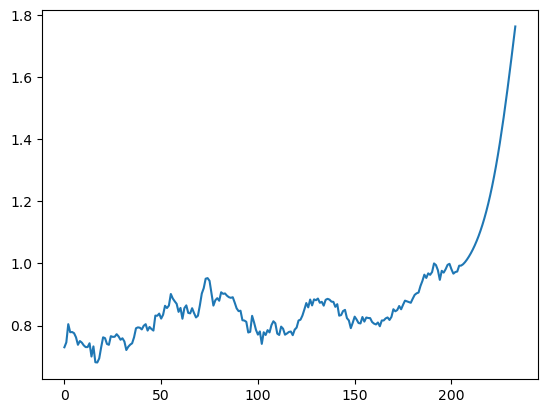

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

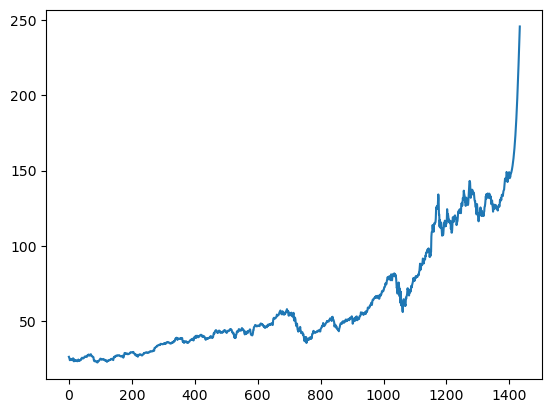

In [49]:
plt.plot(df3)